# Try various CNN networks on MNIST dataset

In [1]:
# https://keras.io/examples/mnist_cnn/

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


C:\Users\Santosh\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


# 1. Reading Data

### load the MNIST dataset and reshape it so that it is suitable for use training a CNN.

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# CNN Model_1 with 3*3 kernel size

#### Layers:  conv2D + conv2D + Maxpooling +Dropout(0.25) +Flatten + Dense(128) +Dropout(0.5)+ Dense(10)

#### Activation:  ReLU

#### Padding :  Same

In [3]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model1= model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 342s 6ms/step - loss: 0.0244 - accuracy: 0.9926 - val_loss: 0.0259 - val_accuracy: 0.9923
Epoch 2/12
60000/60000 [==============================] - 319s 5ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.0253 - val_accuracy: 0.9917
Epoch 3/12
60000/60000 [==============================] - 324s 5ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0289 - val_accuracy: 0.9918
Epoch 4/12
60000/60000 [==============================] - 319s 5ms/step - loss: 0.0229 - accuracy: 0.9932 - val_loss: 0.0261 - val_accuracy: 0.9920
Epoch 5/12
60000/60000 [==============================] - 319s 5ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0273 - val_accuracy: 0.9922
Epoch 6/12
60000/60000 [==============================] - 243s 4ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0275 - val_accuracy: 0.9920
Epoch 7/12
60000/60000 [==============================] - 220s

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027699147709467797
Test accuracy: 0.9914000034332275


### Accuracy and Loss (Error) Plots

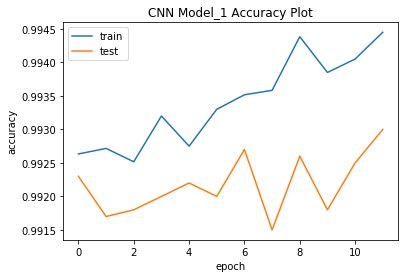

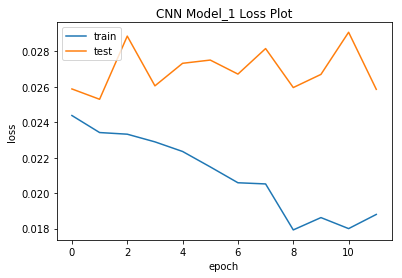

In [20]:
import matplotlib.pyplot as plt
plt.figure(1)

# summary plot for accuracy
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('CNN Model_1 Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.figure(2)
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('CNN Model_1 Loss Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusion
### As the number of layers are less, loss is low i.e 0.027, and accuracy is high i.e. 99.14%

## CNN Model_2 with 3*3 kernel size 

#### Layers: Conv2D + Conv2D + Maxpooling +Dropout(0.2) +Conv2D+BatchNormalization+Maxpooling+Dropout(0.2)+Flatten + Dense(256) +Dropout(0.2)+ Dense(10)

#### Activation: ReLU
#### Padding : Same

In [21]:
from keras.layers import BatchNormalization

In [23]:
model2=Sequential() 


model2.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape))
model2.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.2))
model2.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.2))


model2.add(Flatten())
model2.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes,activation='softmax'))

print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)        

In [24]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model2a= model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 488s 8ms/step - loss: 0.1598 - accuracy: 0.9523 - val_loss: 0.0851 - val_accuracy: 0.9855
Epoch 2/12
60000/60000 [==============================] - 392s 7ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0270 - val_accuracy: 0.9913
Epoch 3/12
60000/60000 [==============================] - 403s 7ms/step - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0271 - val_accuracy: 0.9913
Epoch 4/12
60000/60000 [==============================] - 393s 7ms/step - loss: 0.0262 - accuracy: 0.9919 - val_loss: 0.0239 - val_accuracy: 0.9932
Epoch 5/12
60000/60000 [==============================] - 447s 7ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0267 - val_accuracy: 0.9923
Epoch 6/12
60000/60000 [==============================] - 395s 7ms/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.0225 - val_accuracy: 0.9935
Epoch 7/12
60000/60000 [==============================] - 394s

In [25]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02304300626801023
Test accuracy: 0.9945999979972839


## Accuracy and Loss(Error) Plots

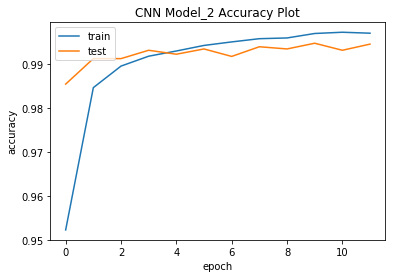

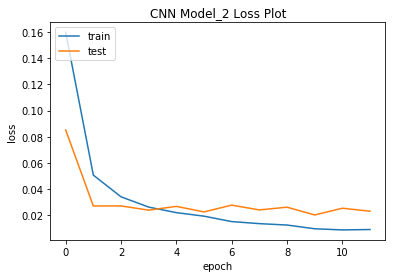

In [28]:
import matplotlib.pyplot as plt
plt.figure(1)

# summary plot for accuracy
plt.plot(model2a.history['accuracy'])
plt.plot(model2a.history['val_accuracy'])
plt.title('CNN Model_2 Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.figure(2)
plt.plot(model2a.history['loss'])
plt.plot(model2a.history['val_loss'])
plt.title('CNN Model_2 Loss Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusion
### The Accuracy increased by adding Batch Normalization, Accuracy=99.45%
### Loss is decreased, Loss=0.023

## CNN Model_3 with 5*5 kernel size 

#### Layers: Conv2D + Conv2D + Maxpooling + Conv2D+ Conv2D + BatchNormalization +Flatten + Dense(1024) +Dense(524)+ Dense(10)

#### Activation: Sigmoid
#### Padding : Same

In [29]:
model3 = Sequential()

model3.add(Conv2D(16,(5,5),activation="sigmoid", input_shape=input_shape))
model3.add(Conv2D(32,(5,5),activation="sigmoid"))
model3.add(MaxPooling2D())

model3.add(Conv2D(64,(3,3),activation="sigmoid"))
model3.add(Conv2D(128, (3, 3), use_bias=False,activation="sigmoid"))
model3.add(BatchNormalization())

model3.add(Flatten())
model3.add(Dense(1024,activation="sigmoid"))
model3.add(Dense(524,activation="sigmoid"))
model3.add(Dense(10,activation="softmax"))

In [30]:
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model3_new = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1011s 17ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0298 - val_accuracy: 0.9921
Epoch 2/12
60000/60000 [==============================] - 921s 15ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0285 - val_accuracy: 0.9928
Epoch 3/12
60000/60000 [==============================] - 904s 15ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0271 - val_accuracy: 0.9931
Epoch 4/12
60000/60000 [==============================] - 1149s 19ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0263 - val_accuracy: 0.9934
Epoch 5/12
60000/60000 [==============================] - 942s 16ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0333 - val_accuracy: 0.9929
Epoch 6/12
60000/60000 [==============================] - 978s 16ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.0308 - val_accuracy: 0.9922
Epoch 7/12
60000/60000 [==============================

In [31]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.480831746673584
Test accuracy: 0.0957999974489212


## Accuracy and Loss(Error) plots

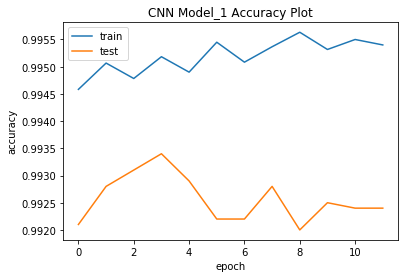

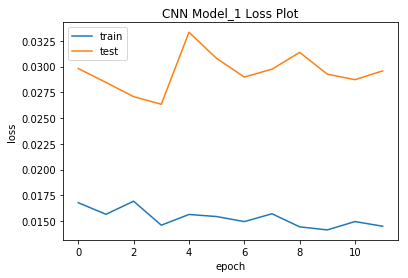

In [32]:
import matplotlib.pyplot as plt
plt.figure(1)

# summary plot for accuracy
plt.plot(model3_new.history['accuracy'])
plt.plot(model3_new.history['val_accuracy'])
plt.title('CNN Model_1 Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.figure(2)
plt.plot(model3_new.history['loss'])
plt.plot(model3_new.history['val_loss'])
plt.title('CNN Model_1 Loss Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusion
### with Sigmoid Activation and no dropout, The Accuracy is very low, Accuracy=9.5%
### Loss has increased, loss=2.480

## CNN Model_4 with 5*5 kernel size 

#### Layers: conv2D + conv2D + Maxpooling + Conv2D + conv2D + Maxpooling +Flatten + Dense(1024) +Dropout(0.8)+ Dense(524)

#### Activation: Relu
#### Padding : valid


In [33]:
model4 = Sequential()
model4.add(Conv2D(16,(5,5),activation='relu'))
model4.add(Conv2D(32,(5,5),activation='relu'))
model4.add(MaxPooling2D())

model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(Conv2D(128, (3, 3),activation='relu'))
model4.add(MaxPooling2D())

model4.add(Flatten())
model4.add(Dense(1024,activation='relu'))
model4.add(Dropout(0.8))
model4.add(Dense(524,activation='relu'))
model4.add(Dense(10,activation='relu'))

In [34]:
model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer= 'adam',  #keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model4_new = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 325s 5ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0315 - val_accuracy: 0.9932
Epoch 2/12
60000/60000 [==============================] - 325s 5ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0326 - val_accuracy: 0.9925
Epoch 3/12
60000/60000 [==============================] - 324s 5ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0248 - val_accuracy: 0.9932
Epoch 4/12
60000/60000 [==============================] - 326s 5ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0290 - val_accuracy: 0.9923
Epoch 5/12
60000/60000 [==============================] - 326s 5ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0295 - val_accuracy: 0.9929
Epoch 6/12
60000/60000 [==============================] - 325s 5ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0299 - val_accuracy: 0.9933
Epoch 7/12
60000/60000 [==============================] - 323s

In [35]:
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 10.292919470214844
Test accuracy: 0.12780000269412994


## Accuracy and Loss(Error) plots

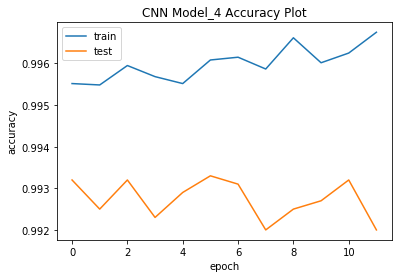

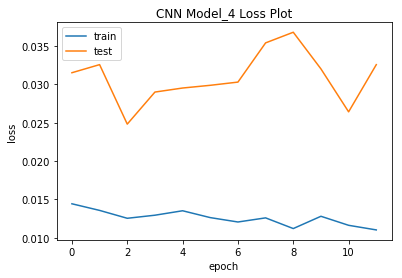

In [36]:
import matplotlib.pyplot as plt
plt.figure(1)

# summary plot for accuracy
plt.plot(model4_new.history['accuracy'])
plt.plot(model4_new.history['val_accuracy'])
plt.title('CNN Model_4 Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.figure(2)
plt.plot(model4_new.history['loss'])
plt.plot(model4_new.history['val_loss'])
plt.title('CNN Model_4 Loss Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusion
### As dropout is increased to 0.8, and by increasing kernal size and batch normalization, accuracy is low, Accuracy= 12.7%
### Loss is more, loss=10

In [48]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "Kernel_size", "Batch Normalization", "Dropout", "Activation", "Test Loss","Test Accuracy"]

x.add_row(["CNN_MNIST-1", "3*3", "No", " Yes=(0.25 & 0.5)", "relu", "0.027", "99.14"])
x.add_row(["CNN_MNIST-2", "3*3", "Yes", "Yes=(0.5)", "relu", "0.023", "99.45"])
x.add_row(["CNN_MNIST-3", "5*5", "Yes", "No",       "sigmoid","2.480",  "9.5"])
x.add_row(["CNN_MNIST-4", "5*5", "No", "Yes=(0.8)", "relu","10",      "12.7"])

print(x)

+-------------+-------------+---------------------+-------------------+------------+-----------+---------------+
|    Model    | Kernel_size | Batch Normalization |      Dropout      | Activation | Test Loss | Test Accuracy |
+-------------+-------------+---------------------+-------------------+------------+-----------+---------------+
| CNN_MNIST-1 |     3*3     |          No         |  Yes=(0.25 & 0.5) |    relu    |   0.027   |     99.14     |
| CNN_MNIST-2 |     3*3     |         Yes         |     Yes=(0.5)     |    relu    |   0.023   |     99.45     |
| CNN_MNIST-3 |     5*5     |         Yes         |         No        |  sigmoid   |   2.480   |      9.5      |
| CNN_MNIST-4 |     5*5     |          No         |     Yes=(0.8)     |    relu    |     10    |      12.7     |
+-------------+-------------+---------------------+-------------------+------------+-----------+---------------+
